### Introduction: 
#####   This project aims to help a young family in their quest to find a safe and a vibrant naighborhood in Chicago,IL

### Data
##### The important Factors to address in this project are: 
##### 1. Can we be able to find a safest Neighborhood(s) in Chicago,IL where the Crime rates are low?.
##### 2. Can we find the safest School(s) in that Neighborhoods?
##### 3. Can we find the Neighborhoods where the above two conditions are met, pact with venues which this Family could enjoy?.

##### The Data sources used in this project are..
##### . Two datasets 'Chicago_Public_Schools_data.csv', 'Crimes_Chicao_2018.csv' will be used to find a safe schools and neighborhoods
##### . Folium will be used to visualize the data
##### . Foursquare API will be used to find list of venues in the neighborhoods so the family could enjoy


In [1]:
# lets start importing the libraries for the project..

In [2]:
import pandas as pd
import numpy as np
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


##### Lets start working with the 'Chicago_Public_Schools_data' dataset in order to find the safest schools in the neighborhood..

In [3]:
raw_chicago_school_df = pd.read_csv('Chicago_Public_Schools_data.csv')
raw_chicago_school_df.head()


,School ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,Freshman on Track Rate %,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


In [4]:
raw_chicago_school_df.columns

Index(['School ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
       'Street Address', 'City', 'State', 'ZIP Code', 'Phone Number', 'Link ',
       'Network Manager', 'Collaborative Name',
       'Adequate Yearly Progress Made? ', 'Track Schedule',
       'CPS Performance Policy Status', 'CPS Performance Policy Level',
       'HEALTHY_SCHOOL_CERTIFIED', 'Safety Icon ', 'SAFETY_SCORE',
       'Family Involvement Icon', 'Family Involvement Score',
       'Environment Icon ', 'Environment Score', 'Instruction Icon ',
       'Instruction Score', 'Leaders Icon ', 'Leaders Score ',
       'Teachers Icon ', 'Teachers Score', 'Parent Engagement Icon ',
       'Parent Engagement Score', 'Parent Environment Icon',
       'Parent Environment Score', 'AVERAGE_STUDENT_ATTENDANCE',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ', 'Pk-2 Literacy %',
       'Pk-2 Math %', 'Gr3-5 Grade Level Math %'

In [5]:
df_chicago_schools = raw_chicago_school_df.copy()
df_chicago_schools.head()

,School ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,Freshman on Track Rate %,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,NDA,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,NDA,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,NDA,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,NDA,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,91.8,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


In [6]:
df_chicago_schools.shape

(566, 78)

In [7]:
# Since our aim is to find the locations of the top 5 best neighborhood schools, we'll remove the redundant data and create a new dataframe with the features we are interested in..
df_cs = df_chicago_schools[['NAME_OF_SCHOOL','COMMUNITY_AREA_NUMBER','COMMUNITY_AREA_NAME','Elementary, Middle, or High School','SAFETY_SCORE','Latitude','Longitude']].copy()
df_cs.head()

,NAME_OF_SCHOOL,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,"Elementary, Middle, or High School",SAFETY_SCORE,Latitude,Longitude
0,Abraham Lincoln Elementary School,7,LINCOLN PARK,ES,99.0,41.924497,-87.644522
1,Adam Clayton Powell Paideia Community Academy ...,43,SOUTH SHORE,ES,54.0,41.760324,-87.556736
2,Adlai E Stevenson Elementary School,70,ASHBURN,ES,61.0,41.747111,-87.731702
3,Agustin Lara Elementary Academy,61,NEW CITY,ES,56.0,41.809757,-87.672145
4,Air Force Academy High School,34,ARMOUR SQUARE,HS,49.0,41.828146,-87.632794


In [8]:
df_cs.shape

(566, 7)

In [9]:
# lets check for any null values..
df_cs.isnull().sum()

NAME_OF_SCHOOL                         0
COMMUNITY_AREA_NUMBER                  0
COMMUNITY_AREA_NAME                    0
Elementary, Middle, or High School     0
SAFETY_SCORE                          53
Latitude                               0
Longitude                              0
dtype: int64

In [10]:
# the column 'SAFETY_SCORE' has 53 NULL values., so lets fill them up with the mean value..
avg_safety_score = df_cs['SAFETY_SCORE'].astype("float").mean(axis=0)
print("Average safety Score:", avg_safety_score)

Average safety Score: 49.50487329434698


In [11]:
df_cs['SAFETY_SCORE'].replace(np.nan, avg_safety_score, inplace=True)

In [12]:
# we check what is the maximum value of the 'SAFETY_SCORE' column..
df_cs['SAFETY_SCORE'].max()


99.0

In [13]:
#Here, we select only the schools with the maximum safety scores..
df_best_safety_cs = df_cs.loc[df_cs['SAFETY_SCORE'] == df_cs['SAFETY_SCORE'].max()]
df_best_safety_cs.head()

,NAME_OF_SCHOOL,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,"Elementary, Middle, or High School",SAFETY_SCORE,Latitude,Longitude
0,Abraham Lincoln Elementary School,7,LINCOLN PARK,ES,99.0,41.924497,-87.644522
10,Alexander Graham Bell Elementary School,5,NORTH CENTER,ES,99.0,41.949528,-87.686055
27,Annie Keller Elementary Gifted Magnet School,74,MOUNT GREENWOOD,ES,99.0,41.697198,-87.697264
39,Augustus H Burley Elementary School,6,LAKE VIEW,ES,99.0,41.937965,-87.669852
118,Edgar Allan Poe Elementary Classical School,50,PULLMAN,ES,99.0,41.702620,-87.606456


In [14]:
df_best_safety_cs.shape

(19, 7)

In [15]:
# Checking again for the null value..
df_best_safety_cs.isnull().sum()

NAME_OF_SCHOOL                        0
COMMUNITY_AREA_NUMBER                 0
COMMUNITY_AREA_NAME                   0
Elementary, Middle, or High School    0
SAFETY_SCORE                          0
Latitude                              0
Longitude                             0
dtype: int64

In [16]:
# lets check duplicate values in the feature 'COMMUNITY_AREA_NUMBER'..
df_best_safety_cs.duplicated(subset=['COMMUNITY_AREA_NUMBER']).any()

True

In [17]:
df_best_safety_cs

,NAME_OF_SCHOOL,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,"Elementary, Middle, or High School",SAFETY_SCORE,Latitude,Longitude
0,Abraham Lincoln Elementary School,7,LINCOLN PARK,ES,99.0,41.924497,-87.644522
10,Alexander Graham Bell Elementary School,5,NORTH CENTER,ES,99.0,41.949528,-87.686055
27,Annie Keller Elementary Gifted Magnet School,74,MOUNT GREENWOOD,ES,99.0,41.697198,-87.697264
39,Augustus H Burley Elementary School,6,LAKE VIEW,ES,99.0,41.937965,-87.669852
118,Edgar Allan Poe Elementary Classical School,50,PULLMAN,ES,99.0,41.702620,-87.606456
119,Edgebrook Elementary School,12,FOREST GLEN,ES,99.0,41.999460,-87.761821
141,Ellen Mitchell Elementary School,24,WEST TOWN,ES,99.0,41.892055,-87.683179
244,James E McDade Elementary Classical School,44,CHATHAM,ES,99.0,41.734514,-87.619177
245,James G Blaine Elementary School,6,LAKE VIEW,ES,99.0,41.950808,-87.664958
326,LaSalle Elementary Language Academy,7,LINCOLN PARK,ES,99.0,41.913882,-87.637601


In [18]:
#lets make a copy of the 'df_best_safety_cs' dataset..
df_best_safety = df_best_safety_cs.copy()

In [19]:
# lets drop the duplicates from the column 'COMMUNITY_AREA_NUMBER'..
df_best_safety.drop_duplicates(subset='COMMUNITY_AREA_NUMBER', keep="first",inplace=True)
df_best_safety

,NAME_OF_SCHOOL,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,"Elementary, Middle, or High School",SAFETY_SCORE,Latitude,Longitude
0,Abraham Lincoln Elementary School,7,LINCOLN PARK,ES,99.0,41.924497,-87.644522
10,Alexander Graham Bell Elementary School,5,NORTH CENTER,ES,99.0,41.949528,-87.686055
27,Annie Keller Elementary Gifted Magnet School,74,MOUNT GREENWOOD,ES,99.0,41.697198,-87.697264
39,Augustus H Burley Elementary School,6,LAKE VIEW,ES,99.0,41.937965,-87.669852
118,Edgar Allan Poe Elementary Classical School,50,PULLMAN,ES,99.0,41.702620,-87.606456
119,Edgebrook Elementary School,12,FOREST GLEN,ES,99.0,41.999460,-87.761821
141,Ellen Mitchell Elementary School,24,WEST TOWN,ES,99.0,41.892055,-87.683179
244,James E McDade Elementary Classical School,44,CHATHAM,ES,99.0,41.734514,-87.619177
408,Northside College Preparatory High School,13,NORTH PARK,HS,99.0,41.981352,-87.708672
412,Norwood Park Elementary School,10,NORWOOD PARK,ES,99.0,41.988181,-87.802992


In [20]:
df_best_safety.duplicated(subset=['COMMUNITY_AREA_NUMBER']).any()

False

In [21]:
df_best_safety_new = df_best_safety[['COMMUNITY_AREA_NUMBER','COMMUNITY_AREA_NAME','NAME_OF_SCHOOL','Latitude','Longitude']].copy()
df_best_safety_new

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,NAME_OF_SCHOOL,Latitude,Longitude
0,7,LINCOLN PARK,Abraham Lincoln Elementary School,41.924497,-87.644522
10,5,NORTH CENTER,Alexander Graham Bell Elementary School,41.949528,-87.686055
27,74,MOUNT GREENWOOD,Annie Keller Elementary Gifted Magnet School,41.697198,-87.697264
39,6,LAKE VIEW,Augustus H Burley Elementary School,41.937965,-87.669852
118,50,PULLMAN,Edgar Allan Poe Elementary Classical School,41.702620,-87.606456
119,12,FOREST GLEN,Edgebrook Elementary School,41.999460,-87.761821
141,24,WEST TOWN,Ellen Mitchell Elementary School,41.892055,-87.683179
244,44,CHATHAM,James E McDade Elementary Classical School,41.734514,-87.619177
408,13,NORTH PARK,Northside College Preparatory High School,41.981352,-87.708672
412,10,NORWOOD PARK,Norwood Park Elementary School,41.988181,-87.802992


In [22]:
df_best_safety_new.rename(columns={'COMMUNITY_AREA_NAME': 'Neighborhood'}, inplace=True)

In [23]:
df_best_safety_new.rename(columns={'COMMUNITY_AREA_NUMBER': 'Neighborhood_NUMBER'}, inplace=True)

In [24]:
# One more time checking for the duplicates..
df_best_safety_new.duplicated(subset=['Neighborhood_NUMBER']).any()

False

In [25]:
df_best_safety_new.duplicated(subset=['Neighborhood']).any()

False

##### Below dataframe shows the communities with best safety schools..

In [26]:
safe_chicago_schools = df_best_safety_new.copy()
safe_chicago_schools.head()

,Neighborhood_NUMBER,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude
0,7,LINCOLN PARK,Abraham Lincoln Elementary School,41.924497,-87.644522
10,5,NORTH CENTER,Alexander Graham Bell Elementary School,41.949528,-87.686055
27,74,MOUNT GREENWOOD,Annie Keller Elementary Gifted Magnet School,41.697198,-87.697264
39,6,LAKE VIEW,Augustus H Burley Elementary School,41.937965,-87.669852
118,50,PULLMAN,Edgar Allan Poe Elementary Classical School,41.702620,-87.606456


In [27]:
safe_chicago_schools.reset_index(drop=True)

,Neighborhood_NUMBER,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude
0,7,LINCOLN PARK,Abraham Lincoln Elementary School,41.924497,-87.644522
1,5,NORTH CENTER,Alexander Graham Bell Elementary School,41.949528,-87.686055
2,74,MOUNT GREENWOOD,Annie Keller Elementary Gifted Magnet School,41.697198,-87.697264
3,6,LAKE VIEW,Augustus H Burley Elementary School,41.937965,-87.669852
4,50,PULLMAN,Edgar Allan Poe Elementary Classical School,41.702620,-87.606456
5,12,FOREST GLEN,Edgebrook Elementary School,41.999460,-87.761821
6,24,WEST TOWN,Ellen Mitchell Elementary School,41.892055,-87.683179
7,44,CHATHAM,James E McDade Elementary Classical School,41.734514,-87.619177
8,13,NORTH PARK,Northside College Preparatory High School,41.981352,-87.708672
9,10,NORWOOD PARK,Norwood Park Elementary School,41.988181,-87.802992


In [28]:
safe_chicago_schools.shape

(12, 5)

##### Now, lets load and analyze the 'Crimes_Chicago_2018' dataset to find the safe Neighborhoods in Chicago,IL..

In [29]:
raw_chicago_crime_df = pd.read_csv("Crimes_Chicao_2018.csv",nrows=600)
raw_chicago_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11561837,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,-87.657709,"(41.763181359, -87.657709477)",17.0,22257.0,65.0,408.0,32.0,23.0,17.0,216.0
1,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.696064,"(41.689078832, -87.696064026)",33.0,4447.0,73.0,256.0,42.0,33.0,9.0,254.0
2,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,-87.647391,"(41.740520866, -87.647390719)",18.0,21554.0,70.0,530.0,13.0,59.0,20.0,233.0
3,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,-87.657625,"(41.857068095, -87.657625201)",8.0,14920.0,33.0,365.0,26.0,43.0,15.0,150.0
4,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,-87.647717,"(41.75191443, -87.647716532)",17.0,21554.0,70.0,487.0,31.0,59.0,20.0,229.0


In [30]:
raw_chicago_crime_df.shape

(600, 30)

In [31]:
df_chicago_crimes = raw_chicago_crime_df.copy()
df_chicago_crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11561837,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,-87.657709,"(41.763181359, -87.657709477)",17.0,22257.0,65.0,408.0,32.0,23.0,17.0,216.0
1,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.696064,"(41.689078832, -87.696064026)",33.0,4447.0,73.0,256.0,42.0,33.0,9.0,254.0
2,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,-87.647391,"(41.740520866, -87.647390719)",18.0,21554.0,70.0,530.0,13.0,59.0,20.0,233.0
3,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,-87.657625,"(41.857068095, -87.657625201)",8.0,14920.0,33.0,365.0,26.0,43.0,15.0,150.0
4,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,-87.647717,"(41.75191443, -87.647716532)",17.0,21554.0,70.0,487.0,31.0,59.0,20.0,229.0


In [32]:
df_chicago_crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats'],
      dtype='object')

In [33]:
df_chicago_crimes.dtypes

ID                              int64
Case Number                    object
Date                           object
Block                          object
IUCR                           object
Primary Type                   object
Description                    object
Location Description           object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                        int64
Ward                            int64
Community Area                  int64
FBI Code                       object
X Coordinate                  float64
Y Coordinate                  float64
Year                            int64
Updated On                     object
Latitude                      float64
Longitude                     float64
Location                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards       

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
df_chicago_crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11561837,JC110056,12/31/2018 11:59:00 PM,013XX W 72ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,734,7,6,67,11,1168573.0,1857018.0,2018,01/17/2019 02:26:36 PM,41.763181,-87.657709,"(41.763181359, -87.657709477)",17.0,22257.0,65.0,408.0,32.0,23.0,17.0,216.0
1,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2211,22,19,74,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)",33.0,4447.0,73.0,256.0,42.0,33.0,9.0,254.0
2,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,613,6,21,71,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)",18.0,21554.0,70.0,530.0,13.0,59.0,20.0,233.0
3,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,1233,12,25,31,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)",8.0,14920.0,33.0,365.0,26.0,43.0,15.0,150.0
4,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,621,6,17,71,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)",17.0,21554.0,70.0,487.0,31.0,59.0,20.0,229.0


In [36]:
df_chicago_crimes['Community Area'].values

array([67, 74, 71, 31, 71, 25, 71,  5,  6, 23,  3, 69, 19,  1, 44,  8, 71,
       28, 29,  6, 66, 73, 16, 70, 73, 15,  8, 25, 30, 23, 67, 28, 76, 22,
       63, 51, 67, 63, 43, 71, 15, 43, 29, 68, 66, 30, 73, 23, 28, 70, 65,
       32, 64, 46,  7, 19, 61,  8, 25, 23, 67, 13,  9, 66, 73, 29, 31, 25,
       71, 56, 15, 76,  2, 27, 61, 72, 33, 49, 66, 70, 12, 22, 63, 27, 62,
       29, 26, 44, 14, 67, 52, 70,  8, 42, 25, 22, 30, 60, 42, 54, 53, 24,
       28, 49, 20,  4, 49, 43, 25, 71, 16, 66, 25, 23, 53, 63, 23, 34, 44,
       30, 25, 24, 49, 50, 59, 25, 26, 53, 19, 46,  7, 71, 29, 75, 15, 24,
        6, 49, 43, 24,  8, 66, 27, 32, 29, 66, 23,  6,  3, 29, 62, 68, 46,
       24, 54, 73, 19, 67, 32,  1, 27, 44, 58,  8, 35, 60, 35, 31, 45, 44,
       28, 71, 29, 32, 67, 32, 71, 67, 75, 73, 29, 73, 46,  8, 28, 14,  8,
       30, 65,  3,  8, 28,  5,  7, 67, 29, 23, 24,  1, 44, 76, 63, 66, 25,
       42, 11, 35, 38, 23, 43, 75, 72, 15, 69, 46, 71, 35, 12, 68, 23, 61,
       27, 75, 40, 43, 32

In [37]:
df_chicago_crimes['Community Areas'].values

array([65., 73., 70., 33., 70., 26., 70., 46., 57., 24., 31., 67., 19.,
       10., 40., 37., 70., 29., 30., 57., 64., 72., 16., 69., 72., 15.,
       37., 26., 32., 24., 65., 29., 75., 23., 61., 48., 65., 61., 39.,
       70., 15., 39., 30., 66., 64., 32., 72., 24., 29., 69., 63., 38.,
       62., 42., 68., 19., 59., 37., 26., 24., 65., 13., 77., 64., 72.,
       30., 33., 26., 70., 53., 15., 75., 20., 28., 59., 71., 34., 45.,
       64., 69., 12., 23., nan, 28., 60., 30., 27., 40., 14., 65., 49.,
       69., 37.,  9., 26., 23., 32., 58.,  9., 51., 50., 25., 29., 45.,
       21.,  6., 45., 39., 26., 70., 16., 64., 26., 24., 50., 64., nan,
       35., 40., 32., 26., 25., 45., 47., 56., 26., 27., 50., 19., 42.,
       68., 70., 30., 74., 15., 25., 57., 45., 39., 25., 37., 64., 28.,
       38., 30., 64., 24., 57., 31., 30., 60., 66., nan, 25., 51., 72.,
       19., 65., 38., 10., 28., 40., 55., 37.,  1., 58.,  1., 33., 41.,
       40., 29., 70., 30., 38., 65., 38., 70., 65., 74., 72., 30

In [38]:
# lets create a new dataframe from the original dataframe with the features we are interested in.. 
# the feature Arrest gives the information about the neighborhood whether there were major crimes commited which involved an arrest..
df_chicago_crimes_new = df_chicago_crimes[['Community Area','Arrest','Latitude','Longitude']]
df_chicago_crimes_new.head()

,Community Area,Arrest,Latitude,Longitude
0,67,False,41.763181,-87.657709
1,74,False,41.689079,-87.696064
2,71,False,41.740521,-87.647391
3,31,True,41.857068,-87.657625
4,71,False,41.751914,-87.647717


In [39]:
# checking for nulls in the dataframe..
df_chicago_crimes_new.isnull().sum()

Community Area     0
Arrest             0
Latitude          27
Longitude         27
dtype: int64

In [40]:
# lets select only the neighborhoods whether there were no arrest involved i.e., Arrest==False
df_chicago_crimes_new = df_chicago_crimes_new.loc[df_chicago_crimes_new['Arrest'] == False]
df_chicago_crimes_new.head()

,Community Area,Arrest,Latitude,Longitude
0,67,False,41.763181,-87.657709
1,74,False,41.689079,-87.696064
2,71,False,41.740521,-87.647391
4,71,False,41.751914,-87.647717
5,25,False,41.875684,-87.760479


In [41]:
# check the Arrest values just to make sure..
df_chicago_crimes_new['Arrest'].values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [42]:
df_chicago_crimes_new.shape

(493, 4)

In [43]:
# checking for null values in the new dataframe..
df_chicago_crimes_new.isnull().sum()

Community Area     0
Arrest             0
Latitude          27
Longitude         27
dtype: int64

In [44]:
df_chicago_crimes_dropna = df_chicago_crimes_new.copy()
df_chicago_crimes_dropna.head()

,Community Area,Arrest,Latitude,Longitude
0,67,False,41.763181,-87.657709
1,74,False,41.689079,-87.696064
2,71,False,41.740521,-87.647391
4,71,False,41.751914,-87.647717
5,25,False,41.875684,-87.760479


In [45]:
df_chicago_crimes_dropna.shape

(493, 4)

In [46]:
# lets drop the rows with null values..
df_chicago_crimes_dropna.dropna(axis=0, inplace=True)

In [47]:
# checking one more time for the null values..
df_chicago_crimes_dropna.isnull().sum()

Community Area    0
Arrest            0
Latitude          0
Longitude         0
dtype: int64

In [48]:
df_chicago_crimes_dropna.shape

(466, 4)

In [49]:
df_chicago_crimes_dropna.rename(columns={'Community Area': 'Neighborhood_NUMBER'}, inplace=True)

In [50]:
df_chicago_crimes_dropna.head()

,Neighborhood_NUMBER,Arrest,Latitude,Longitude
0,67,False,41.763181,-87.657709
1,74,False,41.689079,-87.696064
2,71,False,41.740521,-87.647391
4,71,False,41.751914,-87.647717
5,25,False,41.875684,-87.760479


In [51]:
# lets check for duplicates in the feature 'Neighborhood_NUMBER'
df_chicago_crimes_dropna.duplicated(subset=['Neighborhood_NUMBER']).any()

True

In [52]:
# lets drop the duplicates..
df_chicago_crimes_dropna.drop_duplicates(subset='Neighborhood_NUMBER', keep="first",inplace=True)
df_chicago_crimes_dropna.head()

,Neighborhood_NUMBER,Arrest,Latitude,Longitude
0,67,False,41.763181,-87.657709
1,74,False,41.689079,-87.696064
2,71,False,41.740521,-87.647391
5,25,False,41.875684,-87.760479
7,5,False,41.939625,-87.673996


In [53]:
df_chicago_crimes_dropna.duplicated(subset=['Neighborhood_NUMBER']).any()

False

In [54]:
chicago_no_arrest = df_chicago_crimes_dropna[['Neighborhood_NUMBER','Arrest']]
chicago_no_arrest.head()

,Neighborhood_NUMBER,Arrest
0,67,False
1,74,False
2,71,False
5,25,False
7,5,False


In [55]:
chicago_no_arrest.shape

(69, 2)

##### lets merge the safe_chicago_schools and chicago_no_arrest datasets.. 

In [56]:
df_merged = pd.merge(safe_chicago_schools, chicago_no_arrest, on='Neighborhood_NUMBER',)
df_merged

,Neighborhood_NUMBER,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude,Arrest
0,7,LINCOLN PARK,Abraham Lincoln Elementary School,41.924497,-87.644522,False
1,5,NORTH CENTER,Alexander Graham Bell Elementary School,41.949528,-87.686055,False
2,74,MOUNT GREENWOOD,Annie Keller Elementary Gifted Magnet School,41.697198,-87.697264,False
3,6,LAKE VIEW,Augustus H Burley Elementary School,41.937965,-87.669852,False
4,50,PULLMAN,Edgar Allan Poe Elementary Classical School,41.702620,-87.606456,False
5,12,FOREST GLEN,Edgebrook Elementary School,41.999460,-87.761821,False
6,24,WEST TOWN,Ellen Mitchell Elementary School,41.892055,-87.683179,False
7,44,CHATHAM,James E McDade Elementary Classical School,41.734514,-87.619177,False
8,13,NORTH PARK,Northside College Preparatory High School,41.981352,-87.708672,False
9,10,NORWOOD PARK,Norwood Park Elementary School,41.988181,-87.802992,False


#### Final  Dataframe 'Safe Chicago' shows neighborhoods with No arrest and the highest safety score schools..

In [57]:
safe_chicago = df_merged.copy()

In [58]:
safe_chicago = safe_chicago[['Neighborhood','NAME_OF_SCHOOL','Latitude','Longitude']]
safe_chicago

,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude
0,LINCOLN PARK,Abraham Lincoln Elementary School,41.924497,-87.644522
1,NORTH CENTER,Alexander Graham Bell Elementary School,41.949528,-87.686055
2,MOUNT GREENWOOD,Annie Keller Elementary Gifted Magnet School,41.697198,-87.697264
3,LAKE VIEW,Augustus H Burley Elementary School,41.937965,-87.669852
4,PULLMAN,Edgar Allan Poe Elementary Classical School,41.702620,-87.606456
5,FOREST GLEN,Edgebrook Elementary School,41.999460,-87.761821
6,WEST TOWN,Ellen Mitchell Elementary School,41.892055,-87.683179
7,CHATHAM,James E McDade Elementary Classical School,41.734514,-87.619177
8,NORTH PARK,Northside College Preparatory High School,41.981352,-87.708672
9,NORWOOD PARK,Norwood Park Elementary School,41.988181,-87.802992


In [59]:
#define the map location Chicago,Il
address = 'chicago,illinois'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago,IL are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago,IL are 41.8755616, -87.6244212.


### Initial Visualization of geospatial data with Folium

In [60]:
from folium import plugins

# let's start again with a clean copy of the map of Chicogo,Il
chicago_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(chicago_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(safe_chicago.Latitude, safe_chicago.Longitude, safe_chicago.Neighborhood):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
chicago_map

### Foursquare API application.
##### we will use Foursquare API to get the venues near the aboove neighborhoods..

In [61]:
# @hidden_cell
CLIENT_ID = 'UD12X0VM3NW1MS23JC5R54I1ZYHS3MFF2IVPEDXQKRNPIASZ' # your Foursquare ID
CLIENT_SECRET = 'EHBWQIEGY03BWLQWHW0LCQKGLVDN4QNAQL5I05A0IICYKSSL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:
Neighbourhood_venues = getNearbyVenues(names=safe_chicago['Neighborhood'],
                                   latitudes=safe_chicago['Latitude'],
                                   longitudes=safe_chicago['Longitude']
                                  )
Neighbourhood_venues

LINCOLN PARK
NORTH CENTER
MOUNT GREENWOOD
LAKE VIEW
PULLMAN
FOREST GLEN
WEST TOWN
CHATHAM
NORTH PARK
NORWOOD PARK
WEST RIDGE
GAGE PARK


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,LINCOLN PARK,41.924497,-87.644522,Insomnia Cookies,41.923177,-87.645636,Dessert Shop
1,LINCOLN PARK,41.924497,-87.644522,Potbelly Sandwich Shop,41.923126,-87.645914,Sandwich Place
2,LINCOLN PARK,41.924497,-87.644522,Philz Coffee,41.924928,-87.647455,Coffee Shop
3,LINCOLN PARK,41.924497,-87.644522,Equinox Lincoln Common,41.924204,-87.647667,Gym / Fitness Center
4,LINCOLN PARK,41.924497,-87.644522,Chicago Getaway Hostel,41.926772,-87.644530,Hostel
...,...,...,...,...,...,...,...
279,GAGE PARK,41.794074,-87.690298,La Gloria,41.795050,-87.693693,Convenience Store
280,GAGE PARK,41.794074,-87.690298,Mesquite Pollo Express,41.793693,-87.694284,Mexican Restaurant
281,GAGE PARK,41.794074,-87.690298,Carnitas Uruapan,41.793545,-87.694521,Mexican Restaurant
282,GAGE PARK,41.794074,-87.690298,Super Dollar Mex,41.793949,-87.694939,Convenience Store


In [64]:
print(Neighbourhood_venues.shape)
Neighbourhood_venues.head()

(284, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,LINCOLN PARK,41.924497,-87.644522,Insomnia Cookies,41.923177,-87.645636,Dessert Shop
1,LINCOLN PARK,41.924497,-87.644522,Potbelly Sandwich Shop,41.923126,-87.645914,Sandwich Place
2,LINCOLN PARK,41.924497,-87.644522,Philz Coffee,41.924928,-87.647455,Coffee Shop
3,LINCOLN PARK,41.924497,-87.644522,Equinox Lincoln Common,41.924204,-87.647667,Gym / Fitness Center
4,LINCOLN PARK,41.924497,-87.644522,Chicago Getaway Hostel,41.926772,-87.644530,Hostel


In [65]:
Neighbourhood_venues['Venue Category'].unique()

array(['Dessert Shop', 'Sandwich Place', 'Coffee Shop',
       'Gym / Fitness Center', 'Hostel', 'Pizza Place', 'Donut Shop',
       'Park', 'Italian Restaurant', 'Shoe Store', 'Sushi Restaurant',
       'Ice Cream Shop', 'Music Venue', 'Israeli Restaurant',
       'Halal Restaurant', 'Beer Garden', 'Vietnamese Restaurant',
       'Sculpture Garden', 'Theater', 'Japanese Restaurant',
       'Greek Restaurant', 'Gift Shop', 'Shipping Store', 'Taco Place',
       'Thai Restaurant', 'Gym', 'Mexican Restaurant',
       'Falafel Restaurant', 'Fried Chicken Joint', 'Concert Hall', 'Spa',
       'Café', 'Art Gallery', 'Hot Dog Joint', 'Burger Joint',
       'Cosmetics Shop', 'American Restaurant', 'Bar',
       'Chinese Restaurant', 'Sporting Goods Shop',
       'Health & Beauty Service', 'Clothing Store', 'Peruvian Restaurant',
       'Grocery Store', 'Convenience Store', 'Pub', 'Poke Place',
       'Pharmacy', 'Fast Food Restaurant', 'Deli / Bodega', 'Creperie',
       'Playground', 'Nightc

In [66]:
Neighbourhood_venues = Neighbourhood_venues[Neighbourhood_venues['Venue Category'] != 'Neighborhood']
Neighbourhood_venues['Venue Category'].unique()

array(['Dessert Shop', 'Sandwich Place', 'Coffee Shop',
       'Gym / Fitness Center', 'Hostel', 'Pizza Place', 'Donut Shop',
       'Park', 'Italian Restaurant', 'Shoe Store', 'Sushi Restaurant',
       'Ice Cream Shop', 'Music Venue', 'Israeli Restaurant',
       'Halal Restaurant', 'Beer Garden', 'Vietnamese Restaurant',
       'Sculpture Garden', 'Theater', 'Japanese Restaurant',
       'Greek Restaurant', 'Gift Shop', 'Shipping Store', 'Taco Place',
       'Thai Restaurant', 'Gym', 'Mexican Restaurant',
       'Falafel Restaurant', 'Fried Chicken Joint', 'Concert Hall', 'Spa',
       'Café', 'Art Gallery', 'Hot Dog Joint', 'Burger Joint',
       'Cosmetics Shop', 'American Restaurant', 'Bar',
       'Chinese Restaurant', 'Sporting Goods Shop',
       'Health & Beauty Service', 'Clothing Store', 'Peruvian Restaurant',
       'Grocery Store', 'Convenience Store', 'Pub', 'Poke Place',
       'Pharmacy', 'Fast Food Restaurant', 'Deli / Bodega', 'Creperie',
       'Playground', 'Nightc

In [67]:
Neighbourhood_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
CHATHAM,9,9,9,9,9,9
FOREST GLEN,21,21,21,21,21,21
GAGE PARK,9,9,9,9,9,9
LAKE VIEW,58,58,58,58,58,58
LINCOLN PARK,99,99,99,99,99,99
MOUNT GREENWOOD,5,5,5,5,5,5
NORTH CENTER,28,28,28,28,28,28
NORTH PARK,12,12,12,12,12,12
NORWOOD PARK,8,8,8,8,8,8


In [68]:
print('There are {} uniques categories.'.format(len(Neighbourhood_venues['Venue Category'].unique())))

There are 117 uniques categories.


In [69]:
Neighbourhood_onehot = pd.get_dummies(Neighbourhood_venues[['Venue Category']], prefix="", prefix_sep="")

safe_neigh = Neighbourhood_venues['Neighborhood']

Neighbourhood_onehot = pd.concat([safe_neigh, Neighbourhood_onehot], axis = 1)

Neighbourhood_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bank,Bar,Beer Garden,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Currency Exchange,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Ice Cream Shop,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Nightclub,Optical Shop,Paper / Office Supplies Store,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Ukrainian Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,LINCOLN PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,LINCOLN PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,LINCOLN PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,LINCOLN PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LINCOLN PARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
Neighbourhood_onehot.shape

(283, 118)

In [71]:
Neighbourhood_onehot.columns.values

array(['Neighborhood', 'American Restaurant', 'Antique Shop',
       'Art Gallery', 'Art Museum', 'Asian Restaurant', 'Bakery', 'Bank',
       'Bar', 'Beer Garden', 'Boutique', 'Bowling Alley',
       'Breakfast Spot', 'Burger Joint', 'Bus Station', 'Café',
       'Caribbean Restaurant', 'Chinese Restaurant', 'Clothing Store',
       'Coffee Shop', 'Concert Hall', 'Convenience Store',
       'Cosmetics Shop', 'Creperie', 'Currency Exchange', 'Deli / Bodega',
       'Dessert Shop', 'Diner', 'Discount Store', 'Dive Bar', 'Dog Run',
       'Donut Shop', 'Eastern European Restaurant', 'Falafel Restaurant',
       'Fast Food Restaurant', 'Flower Shop', 'Food', 'Food Truck',
       'Fried Chicken Joint', 'Furniture / Home Store', 'Gas Station',
       'Gastropub', 'Gift Shop', 'Gourmet Shop', 'Greek Restaurant',
       'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Halal Restaurant',
       'Health & Beauty Service', 'Historic Site', 'History Museum',
       'Hobby Shop', 'Home Service', '

In [72]:
Neighbourhood_grouped = Neighbourhood_onehot.groupby('Neighborhood').mean().reset_index()
Neighbourhood_grouped

,Neighborhood,American Restaurant,Antique Shop,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bank,Bar,Beer Garden,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Currency Exchange,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Ice Cream Shop,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Liquor Store,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Store,Music Venue,Nail Salon,Nightclub,Optical Shop,Paper / Office Supplies Store,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Sculpture Garden,Shipping Store,Shoe Store,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Ukrainian Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,CHATHAM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000,0.000000,0.000000,0.000000,0.222222,0.000000,0.111111,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,FOREST GLEN,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.047619,0.0,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.095238,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000
2,GAGE PARK,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000

In [73]:
Neighbourhood_grouped.shape

(12, 118)

In [74]:
num_top_venues = 5

for hood in Neighbourhood_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Neighbourhood_grouped[Neighbourhood_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----CHATHAM----
                  venue  freq
0  Fast Food Restaurant  0.22
1         Train Station  0.11
2                  Food  0.11
3        Discount Store  0.11
4           Gas Station  0.11


----FOREST GLEN----
                 venue  freq
0       Sandwich Place  0.10
1  American Restaurant  0.05
2           Sports Bar  0.05
3   Mexican Restaurant  0.05
4       Ice Cream Shop  0.05


----GAGE PARK----
                venue  freq
0  Mexican Restaurant  0.33
1   Convenience Store  0.22
2      Sandwich Place  0.11
3    Asian Restaurant  0.11
4   Currency Exchange  0.11


----LAKE VIEW----
                  venue  freq
0  Gym / Fitness Center  0.09
1                   Gym  0.05
2           Pizza Place  0.05
3                   Bar  0.05
4    Salon / Barbershop  0.05


----LINCOLN PARK----
                venue  freq
0                 Bar  0.10
1      Sandwich Place  0.04
2    Sushi Restaurant  0.04
3         Coffee Shop  0.04
4  Italian Restaurant  0.03


----MOUNT GREENWOOD----
   

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [76]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Neighbourhood_grouped['Neighborhood']

for ind in np.arange(Neighbourhood_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Neighbourhood_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,CHATHAM,Fast Food Restaurant,Discount Store,Intersection,Restaurant,Train Station,Food,Gas Station,Gastropub,Gift Shop,Donut Shop
1,FOREST GLEN,Sandwich Place,American Restaurant,Bus Station,Ice Cream Shop,Grocery Store,Gas Station,Mexican Restaurant,Optical Shop,Park,Diner
2,GAGE PARK,Mexican Restaurant,Convenience Store,Park,Asian Restaurant,Sandwich Place,Currency Exchange,Yoga Studio,Gas Station,Furniture / Home Store,Fried Chicken Joint
3,LAKE VIEW,Gym / Fitness Center,Salon / Barbershop,Pizza Place,Bar,Gym,Furniture / Home Store,Massage Studio,Restaurant,Thrift / Vintage Store,Yoga Studio
4,LINCOLN PARK,Bar,Coffee Shop,Sushi Restaurant,Sandwich Place,Italian Restaurant,Thai Restaurant,Pizza Place,Gym,Burger Joint,Café
5,MOUNT GREENWOOD,Park,Intersection,Gourmet Shop,Home Service,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,Food Truck
6,NORTH CENTER,Pizza Place,Bus Station,Sandwich Place,Pub,Fast Food Restaurant,Mexican Restaurant,Cosmetics Shop,Convenience Store,Mediterranean Restaurant,Coffee Shop
7,NORTH PARK,Korean Restaurant,Tea Room,Mediterranean Restaurant,Music Venue,Asian Restaurant,Japanese Restaurant,Park,Taco Place,Coffee Shop,Bus Station
8,NORWOOD PARK,Park,Dog Run,Diner,Gym,Hobby Shop,Clothing Store,Juice Bar,Fast Food Restaurant,Gastropub,Food
9,PULLMAN,History Museum,Food,Yoga Studio,Gourmet Shop,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food Truck


In [77]:
Neighbourhood_grouped_clustering = Neighbourhood_grouped.drop('Neighborhood', 1)

## Modeling:
##### In order to cluster our neighborhoods, we'll use KMeans clustering.. 
##### In the below cell, instead of randomly assigning Number of clusters, we'll use Elbow method to find the optimal number of clusters

In [93]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(Neighbourhood_grouped_clustering)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[1.5034164257993186,
 1.032463040485384,
 0.7735348903098497,
 0.5899465381757922,
 0.4637979136920384,
 0.32680551340395925,
 0.20691310185757086,
 0.126254553879624,
 0.08395031988405849]

Text(0, 0.5, 'WCSS')

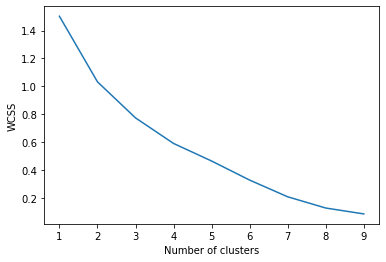

In [94]:
import matplotlib.pyplot as plt
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [80]:
# set number of clusters
kclusters = 3

#Neighbourhood_grouped_clustering = Neighbourhood_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_new = KMeans(n_clusters=kclusters, random_state=0).fit(Neighbourhood_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_new.labels_[0:10] 

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 2])

### Results after KMeans clustering on neighborhoods..

In [81]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_new.labels_)

safe_chicago_neigh_merged = safe_chicago

# merge Neighbourhood_grouped with safe_chicago to add latitude/longitude for each neighborhood
safe_chicago_neigh_merged = safe_chicago_neigh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

safe_chicago_neigh_merged # check the last columns!

,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LINCOLN PARK,Abraham Lincoln Elementary School,41.924497,-87.644522,0,Bar,Coffee Shop,Sushi Restaurant,Sandwich Place,Italian Restaurant,Thai Restaurant,Pizza Place,Gym,Burger Joint,Café
1,NORTH CENTER,Alexander Graham Bell Elementary School,41.949528,-87.686055,0,Pizza Place,Bus Station,Sandwich Place,Pub,Fast Food Restaurant,Mexican Restaurant,Cosmetics Shop,Convenience Store,Mediterranean Restaurant,Coffee Shop
2,MOUNT GREENWOOD,Annie Keller Elementary Gifted Magnet School,41.697198,-87.697264,1,Park,Intersection,Gourmet Shop,Home Service,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,Food Truck
3,LAKE VIEW,Augustus H Burley Elementary School,41.937965,-87.669852,0,Gym / Fitness Center,Salon / Barbershop,Pizza Place,Bar,Gym,Furniture / Home Store,Massage Studio,Restaurant,Thrift / Vintage Store,Yoga Studio
4,PULLMAN,Edgar Allan Poe Elementary Classical School,41.702620,-87.606456,2,History Museum,Food,Yoga Studio,Gourmet Shop,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food Truck
5,FOREST GLEN,Edgebrook Elementary School,41.999460,-87.761821,0,Sandwich Place,American Restaurant,Bus Station,Ice Cream Shop,Grocery Store,Gas Station,Mexican Restaurant,Optical Shop,Park,Diner
6,WEST TOWN,Ellen Mitchell Elementary School,41.892055,-87.683179,0,Pub,Art Museum,Pizza Place,Yoga Studio,Flower Shop,Liquor Store,Hot Dog Joint,Grocery Store,Food Truck,Eastern European Restaurant
7,CHATHAM,James E McDade Elementary Classical School,41.734514,-87.619177,0,Fast Food Restaurant,Discount Store,Intersection,Restaurant,Train Station,Food,Gas Station,Gastropub,Gift Shop,Donut Shop
8,NORTH PARK,Northside College Preparatory High School,41.981352,-87.708672,0,Korean Restaurant,Tea Room,Mediterranean Restaurant,Music Venue,Asian Restaurant,Japanese Restaurant,Park,Taco Place,Coffee Shop,Bus Station
9,NORWOOD PARK,Norwood Park Elementary School,41.988181,-87.802992,1,Park,Dog Run,Diner,Gym,Hobby Shop,Clothing Store,Juice Bar,Fast Food Restaurant,Gastropub,Food


### using Folium to view the clustering..

In [82]:
map_clusters = folium.Map(location=[41.8755616, -87.6244212], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(safe_chicago_neigh_merged['Latitude'], safe_chicago_neigh_merged['Longitude'], safe_chicago_neigh_merged['Neighborhood'], safe_chicago_neigh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining the clusters generated by our Model..

In [83]:
# cluster 1:

In [84]:
neigh_cluster1 = safe_chicago_neigh_merged.loc[safe_chicago_neigh_merged['Cluster Labels'] == 0, safe_chicago_neigh_merged.columns[[0,1,2,3] + list(range(5, safe_chicago_neigh_merged.shape[1]))]]
neigh_cluster1

,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LINCOLN PARK,Abraham Lincoln Elementary School,41.924497,-87.644522,Bar,Coffee Shop,Sushi Restaurant,Sandwich Place,Italian Restaurant,Thai Restaurant,Pizza Place,Gym,Burger Joint,Café
1,NORTH CENTER,Alexander Graham Bell Elementary School,41.949528,-87.686055,Pizza Place,Bus Station,Sandwich Place,Pub,Fast Food Restaurant,Mexican Restaurant,Cosmetics Shop,Convenience Store,Mediterranean Restaurant,Coffee Shop
3,LAKE VIEW,Augustus H Burley Elementary School,41.937965,-87.669852,Gym / Fitness Center,Salon / Barbershop,Pizza Place,Bar,Gym,Furniture / Home Store,Massage Studio,Restaurant,Thrift / Vintage Store,Yoga Studio
5,FOREST GLEN,Edgebrook Elementary School,41.999460,-87.761821,Sandwich Place,American Restaurant,Bus Station,Ice Cream Shop,Grocery Store,Gas Station,Mexican Restaurant,Optical Shop,Park,Diner
6,WEST TOWN,Ellen Mitchell Elementary School,41.892055,-87.683179,Pub,Art Museum,Pizza Place,Yoga Studio,Flower Shop,Liquor Store,Hot Dog Joint,Grocery Store,Food Truck,Eastern European Restaurant
7,CHATHAM,James E McDade Elementary Classical School,41.734514,-87.619177,Fast Food Restaurant,Discount Store,Intersection,Restaurant,Train Station,Food,Gas Station,Gastropub,Gift Shop,Donut Shop
8,NORTH PARK,Northside College Preparatory High School,41.981352,-87.708672,Korean Restaurant,Tea Room,Mediterranean Restaurant,Music Venue,Asian Restaurant,Japanese Restaurant,Park,Taco Place,Coffee Shop,Bus Station
10,WEST RIDGE,Stephen Decatur Classical Elementary School,42.009307,-87.704655,Bar,Pizza Place,Fast Food Restaurant,Thai Restaurant,Liquor Store,Food Truck,Gastropub,Gas Station,Furniture / Home Store,Fried Chicken Joint
11,GAGE PARK,Talman Elementary School,41.794074,-87.690298,Mexican Restaurant,Convenience Store,Park,Asian Restaurant,Sandwich Place,Currency Exchange,Yoga Studio,Gas Station,Furniture / Home Store,Fried Chicken Joint


##### Visualization of cluster '1' of neighborhoods..

In [85]:
from folium import plugins

# let's start again with a clean copy of the map of Chicogo,Il
cluster1_map = folium.Map(location = [41.8755616, -87.6244212], zoom_start = 12)

# instantiate a mark cluster object for the neighborhood data in the dataframe
neigh_data1 = plugins.MarkerCluster().add_to(cluster1_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(neigh_cluster1.Latitude, neigh_cluster1.Longitude, neigh_cluster1.Neighborhood):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(neigh_data1)

# display map
cluster1_map

In [86]:
# cluster 2:

In [87]:
neigh_cluster2 = safe_chicago_neigh_merged.loc[safe_chicago_neigh_merged['Cluster Labels'] == 1, safe_chicago_neigh_merged.columns[[0,1,2,3] + list(range(5, safe_chicago_neigh_merged.shape[1]))]]
neigh_cluster2

,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,MOUNT GREENWOOD,Annie Keller Elementary Gifted Magnet School,41.697198,-87.697264,Park,Intersection,Gourmet Shop,Home Service,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,Food Truck
9,NORWOOD PARK,Norwood Park Elementary School,41.988181,-87.802992,Park,Dog Run,Diner,Gym,Hobby Shop,Clothing Store,Juice Bar,Fast Food Restaurant,Gastropub,Food


##### Visualization of cluster '2' of neighborhoods..

In [88]:
from folium import plugins

# let's start again with a clean copy of the map of Chicogo,Il
cluster2_map = folium.Map(location = [41.8755616, -87.6244212], zoom_start = 12)

# instantiate a mark cluster object for the neighborhood data in the dataframe
neigh_data2 = plugins.MarkerCluster().add_to(cluster2_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(neigh_cluster2.Latitude, neigh_cluster2.Longitude, neigh_cluster2.Neighborhood):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(neigh_data2)

# display map
cluster2_map

In [89]:
# cluster 3:

In [90]:
neigh_cluster3 = safe_chicago_neigh_merged.loc[safe_chicago_neigh_merged['Cluster Labels'] == 2, safe_chicago_neigh_merged.columns[[0,1,2,3] + list(range(5, safe_chicago_neigh_merged.shape[1]))]]
neigh_cluster3

,Neighborhood,NAME_OF_SCHOOL,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,PULLMAN,Edgar Allan Poe Elementary Classical School,41.70262,-87.606456,History Museum,Food,Yoga Studio,Gourmet Shop,Donut Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food Truck


In [91]:
##### Visualization of cluster '3' of neighborhoods..

In [92]:
from folium import plugins

# let's start again with a clean copy of the map of Chicogo,Il
cluster3_map = folium.Map(location = [41.8755616, -87.6244212], zoom_start = 12)

# instantiate a mark cluster object for the neighborhood data in the dataframe
neigh_data3 = plugins.MarkerCluster().add_to(cluster3_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(neigh_cluster3.Latitude, neigh_cluster3.Longitude, neigh_cluster3.Neighborhood):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(neigh_data3)

# display map
cluster3_map